
![](1.jpg)

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

In [36]:
data = pd.read_csv("london_merged.csv")
data = pd.DataFrame(data)
print("DataFrame axes : ",data.shape)

DataFrame axes :  (17414, 10)


In [5]:
data.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [37]:
data["weather_code"] = data["weather_code"].astype(int)
data["is_holiday"]   = data["is_holiday"].astype(int)
data["season"]       = data["season"].astype(int)

In [17]:
# Checking for null value's
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

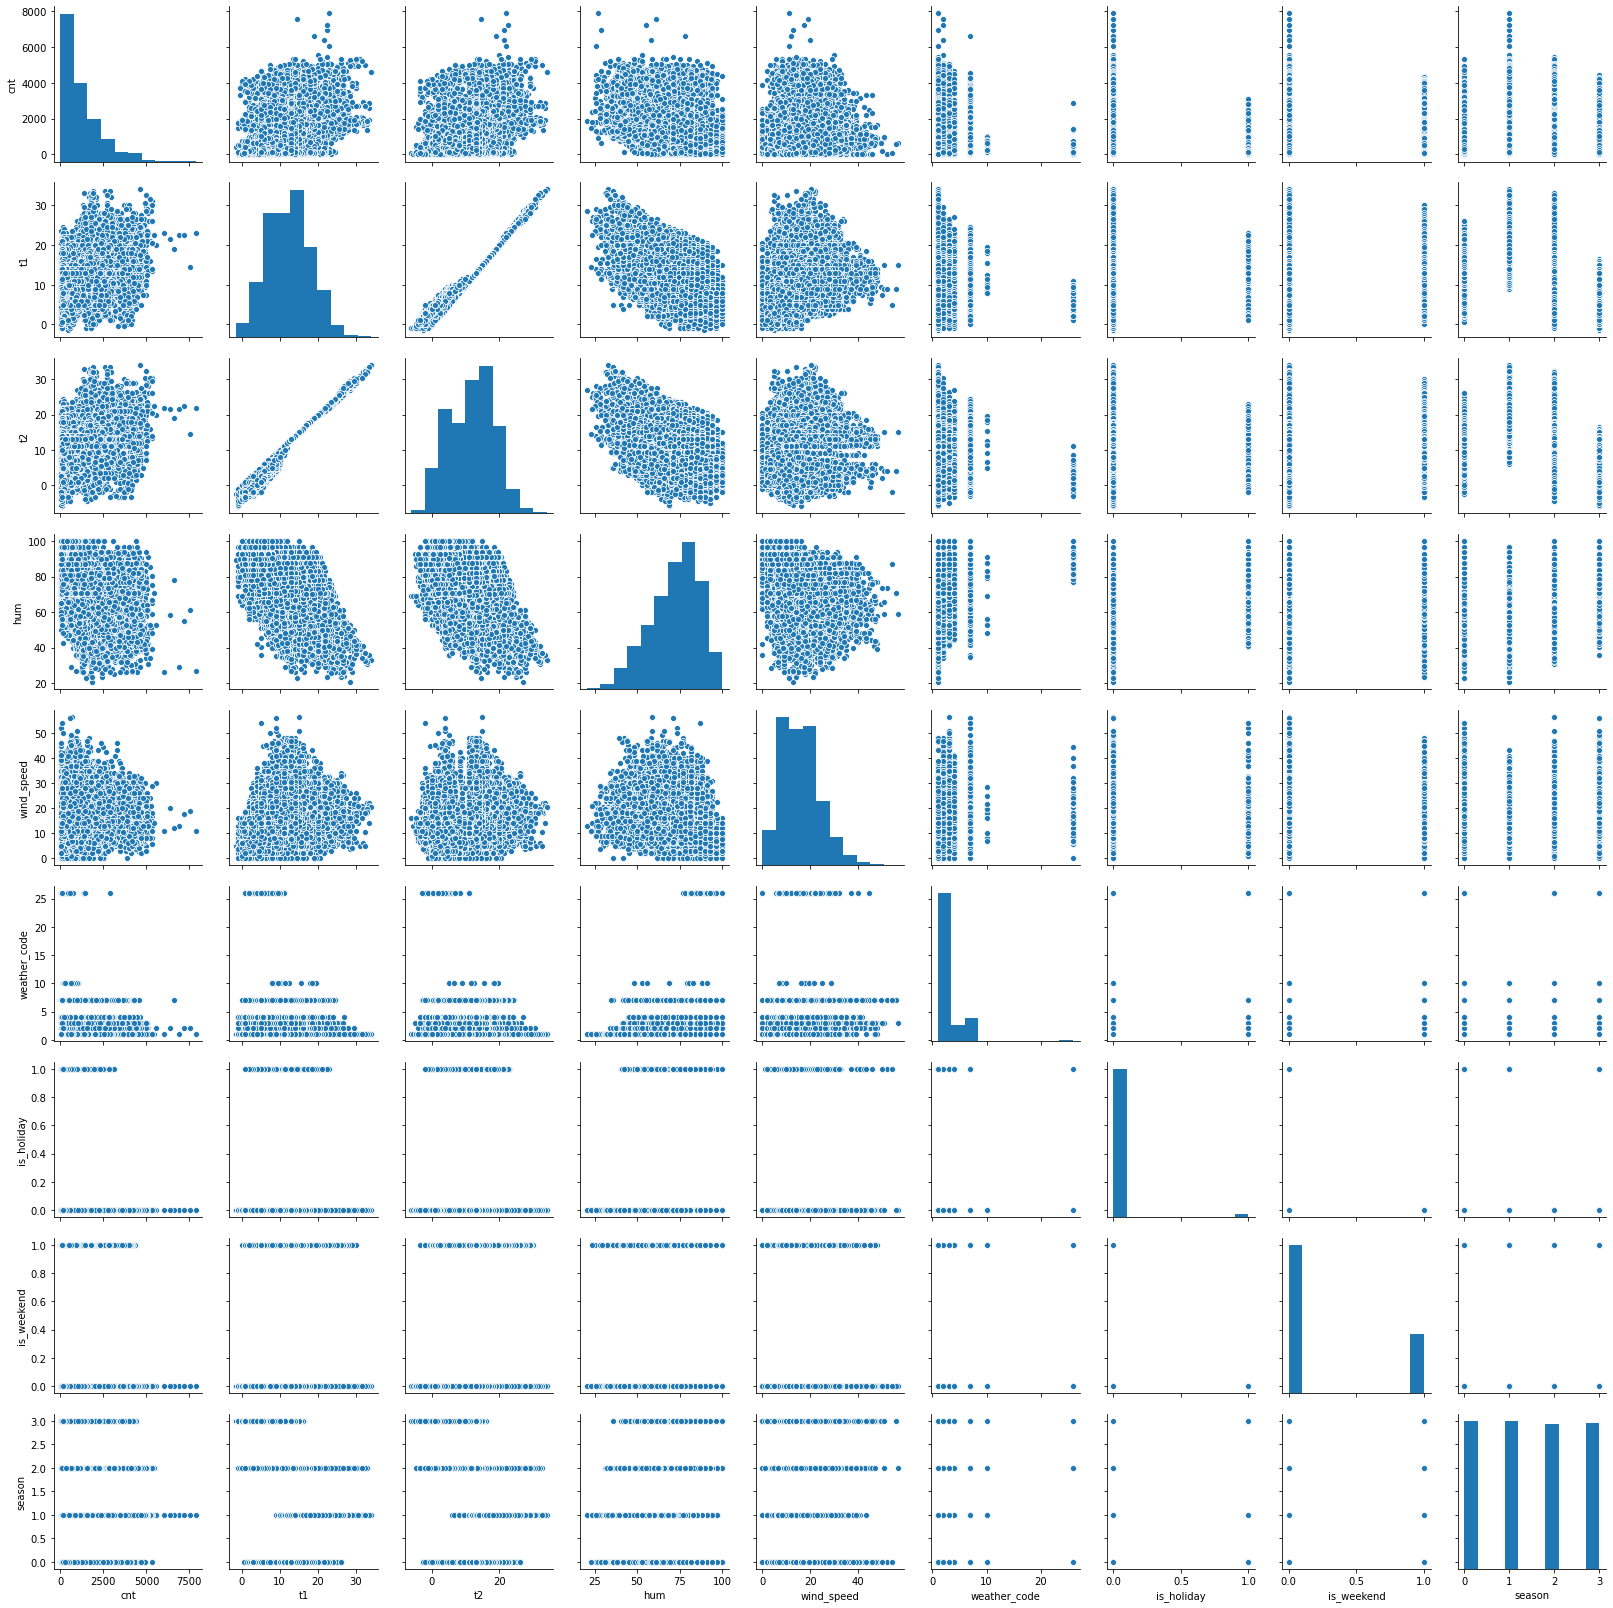

In [21]:
sns.pairplot(data[data.iloc[:,1:].columns])

In [40]:
data['timestamp'].head(2)

0   2015-01-04 00:00:00
1   2015-01-04 01:00:00
Name: timestamp, dtype: datetime64[ns]

In [45]:
data['timestamp'] = pd.to_datetime(data['timestamp'],format = "%Y-%m-%d %H:%M:%S")
data["year"]  = data.timestamp.dt.year
data["month"] = data.timestamp.dt.month
data["day"]   = data.timestamp.dt.day
data["hour"]  = data.timestamp.dt.hour

In [52]:
for i in ["year","month","day","hour"]:
    print("unique values in : ", i ,"\n")
    print(data[i].unique(),"\n")
    print("__"*20)

unique values in :  year 

[2015 2016 2017] 

________________________________________
unique values in :  month 

[ 1  2  3  4  5  6  7  8  9 10 11 12] 

________________________________________
unique values in :  day 

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31  1  2  3] 

________________________________________
unique values in :  hour 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 

________________________________________


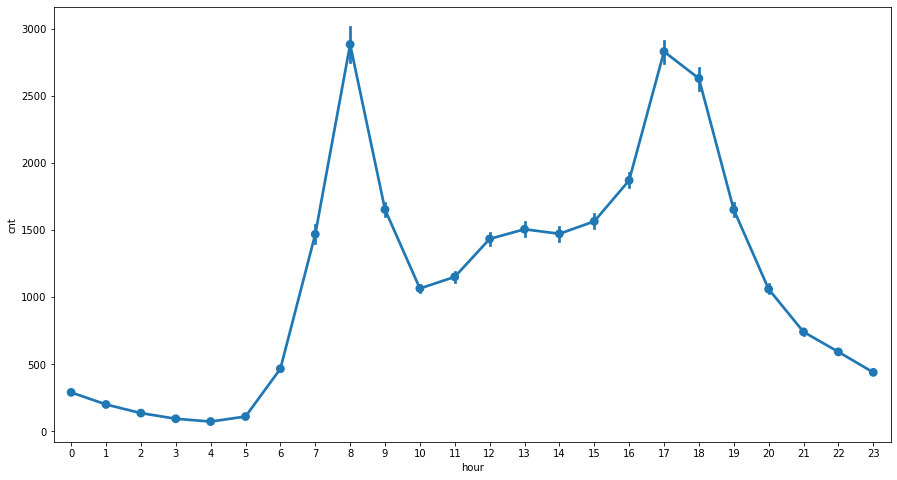

In [77]:
sns.pointplot(data = data,x ="hour",y="cnt")

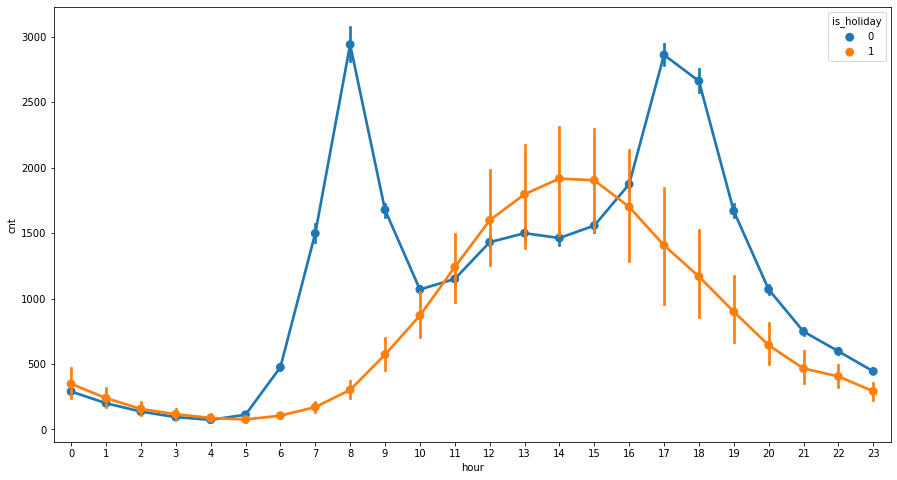

In [79]:
sns.pointplot(data = data,x ="hour",y="cnt",hue = "is_holiday")

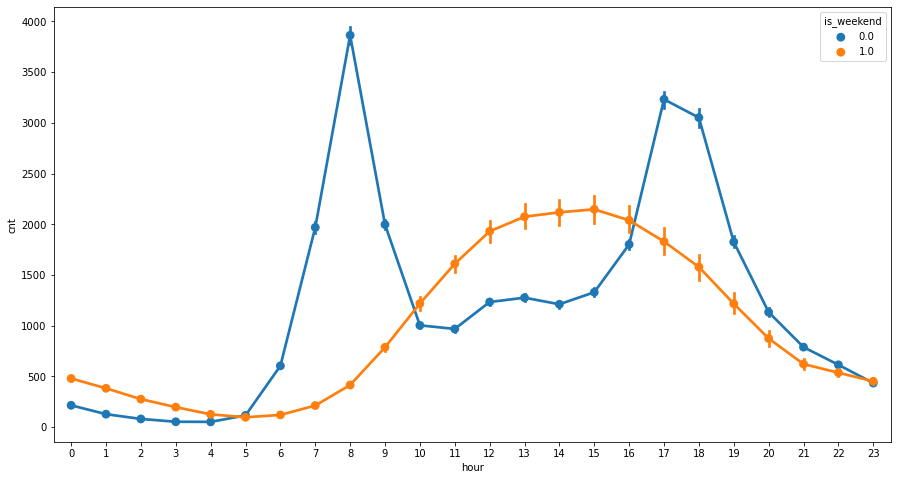

In [65]:
sns.pointplot(data = data,x ="hour",y="cnt",hue = "is_weekend")

from the above charts it is clearly visible that during holidays or weekend people tend use bike's to complete there any  work during morning or night time
i.e  5 to 10 and 16 to 20  # eg : going for market in morning or going for pub at night time :). 

But during aftenoon (holiday or weekend) most of the people might like to  sleep in home >>(me) that's why bike sharing count seems less in afternoon hours .

again this what my assumption ! correct me if am wrong :)

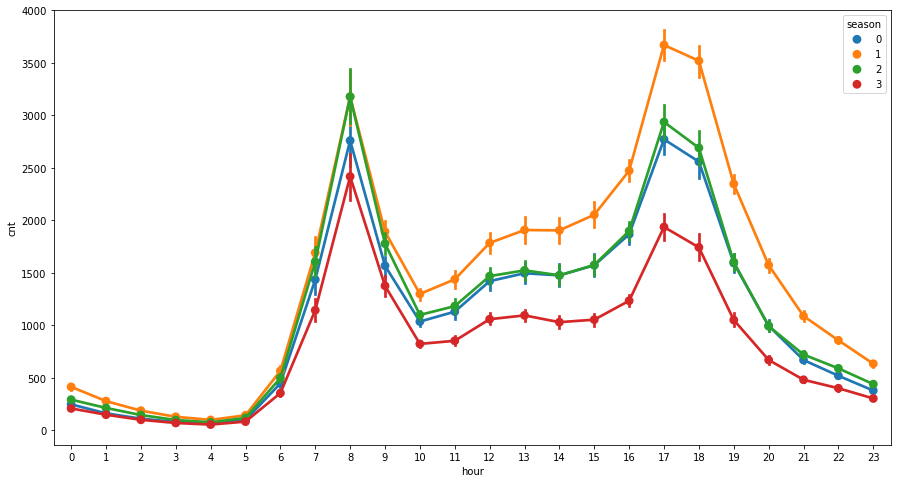

In [66]:
sns.pointplot(data = data,x ="hour",y="cnt",hue = "season")

from above chart is clearly visible that people use bikes no matter what season it might be,so we are good with this feature

In [95]:
year_wise = pd.pivot_table(data,index= "year",values ="cnt",aggfunc = "count")
px.bar(x= year_wise.index ,y = year_wise["cnt"],color = year_wise.index ,labels = {"x":"year","y":"Total count of Bike Sharing in each year"})

In [97]:
season_wise = pd.pivot_table(data,index= "season",values ="cnt",aggfunc = "count")
px.bar(x= season_wise.index ,y = season_wise["cnt"],color = season_wise.index ,labels = {"x":"season","y":"Total count of Bike Sharing in each season combining all all three years"})